# Tarea de Programación: Regresión más Profunda, Características más Inteligentes (Deeper Regression, Smarter Features)

¡Bienvenido a tu primera tarea!

Has construido una base sólida en este módulo, pasando de modelos lineales simples a redes que pueden capturar patrones complejos y no lineales. Ahora, es el momento de aplicar esas habilidades a un desafío que refleja cómo funcionan los proyectos en un escenario del mundo real.

Hasta ahora, has trabajado con tensores pequeños creados manualmente. Esta vez, subirás de nivel cargando un conjunto de datos más grande desde un archivo `.csv`, un primer paso común en cualquier tarea de machine learning. Este problema también es más complejo: en lugar de una sola entrada prediciendo un resultado, tendrás **múltiples características (features)** que trabajan juntas para influir en el tiempo de entrega final.

Esta tarea también te introduce a una de las partes más creativas e impactantes del machine learning: la **ingeniería de características (feature engineering)**. Podrás escribir una función que cree una característica completamente nueva a partir de los datos existentes. Diseñar características como esta es una habilidad importante que te permite construir modelos más potentes y perspicaces.

**Lo que harás en esta tarea**

* Preparar el conjunto de datos multicaracterística utilizando normalización y manipulaciones avanzadas de tensores.
* Diseñar una nueva característica (feature engineering) para capturar patrones más complejos.
* Construir una red neuronal más sofisticada con múltiples capas ocultas (hidden layers).
* Entrenar tu modelo con los datos preparados.
* Predecir un tiempo de entrega para un pedido nuevo y no visto previamente.

¡Empecemos!

---
<a name='submission'></a>

<h4 style="color:green; font-weight:bold;">CONSEJOS PARA UNA CALIFICACIÓN EXITOSA DE TU TAREA:</h4>

* Todas las celdas están bloqueadas excepto aquellas donde debes enviar tus soluciones o cuando se mencione explícitamente que puedes interactuar con ellas.

* En cada celda de ejercicio, busca los comentarios `### START CODE HERE ###` y `### END CODE HERE ###`. Estos te indican dónde escribir el código de la solución. **No agregues ni cambies ningún código que esté fuera de estos comentarios**.

* Puedes agregar nuevas celdas para experimentar, pero estas serán omitidas por el calificador, así que no dependas de celdas recién creadas para alojar el código de tu solución; utiliza los espacios proporcionados para ello.

* Evita el uso de variables globales a menos que sea absolutamente necesario. El calificador prueba tu código en un entorno aislado sin ejecutar todas las celdas desde el principio. Como resultado, las variables globales podrían no estar disponibles al calificar tu entrega. Las variables globales que están destinadas a ser utilizadas estarán definidas en MAYÚSCULAS.

* Para enviar tu notebook para calificar, primero guárdalo haciendo clic en el icono 💾 en la parte superior izquierda de la página y luego haz clic en el botón `Submit assignment` en la parte superior derecha de la página.
---

## Table of Contents
- [Imports](#0)
- [1 - Multi-Feature Data](#1)
    - [1.1 - Loading and Exploring the Raw Data](#1-1)
    - [1.2 - Feature Engineering: Adding Rush Hour](#1-2)
        - **[Exercise 1 - rush_hour_feature](#ex-1)**
    - [1.3 - Building the Data Preparation Pipeline](#1-3)
        - **[Exercise 2 - prepare_data](#ex-2)**
    - [1.4 - Visualizing the Prepared Data](#1-4)
- [2 - Building the Neural Network](#2)
    - **[Exercise 3 - init_model](#ex-3)**
- [3 - Training the Model](#3)
    - **[Exercise 4 - train_model](#ex-4)**
- [4 - Evaluating Model Performance](#4)
- [5 - Making a New Prediction](#5)

<a name='0'></a>
## Imports

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
import matplotlib.pyplot as plt

import helper_utils
#import unittests

<a name='1'></a>
## 1 - Datos Multicaracterística (Multi-Feature Data)

Esta vez, trabajarás con un conjunto de datos mucho más rico proveniente de un archivo `.csv`, que contiene registros de **100 entregas pasadas**. A diferencia de los laboratorios anteriores donde el tiempo dependía solo de la distancia, este nuevo problema es más complejo. El tiempo de entrega final ahora está influenciado por múltiples características de entrada (input features).

Aquí tienes un desglose de los datos con los que trabajarás:

* **distance_miles**: La distancia total de la ruta de entrega en **millas**, representada como un número de punto flotante.

* **time_of_day_hours**: La hora en que el pedido fue **despachado para su entrega** en **horas** en un reloj de 24 horas, representada como un número de punto flotante (por ejemplo, `16.07` representa una hora de despacho poco después de las 4:00 PM).

* **is_weekend**: Una característica binaria que representa el día de la semana, donde `1` indica un fin de semana y `0` indica un día laborable.

* **delivery_time_minutes**: Esta es tu **variable objetivo (target variable)**. Es el tiempo total que tomó la entrega en minutos, representado como un número de punto flotante.

Para que el escenario sea más realista, estos datos operan bajo algunas reglas de negocio: **las entregas solo ocurren entre las 8:00 AM (8.0) y las 8:00 PM (20.0), y la empresa no realiza entregas a más de 20 millas**.

<a name='1-1'></a>
### 1.1 - Carga y Exploración de los Datos Crudos (Loading and Exploring the Raw Data)

Carga y comprende tus datos.

* Define la ruta del archivo de tu conjunto de datos, `./data_with_features.csv`.
* Usa la librería Pandas para cargar el conjunto de datos desde la ruta del archivo dada como un DataFrame, `data_df`, una estructura potente para manipular y analizar datos.
* Inspecciona la forma (shape) de tus datos, que se mostrará como **100 filas** (que representan 100 entregas) y **4 columnas**.

In [4]:
# Load the dataset from the CSV file
file_path = './data_with_features.csv'
data_df = pd.read_csv(file_path)

# Print the shape of the DataFrame
print(f"Dataset Shape: {data_df.shape}\n")

Dataset Shape: (100, 4)



* Inspecciona las filas del conjunto de datos cargado.
    * Por defecto, `rows_to_display` está configurado en `10`, pero siéntete libre de cambiar este valor a un número diferente para explorar los datos.

In [5]:
# EDITABLE CELL:

# Set the number of rows you want to display.
rows_to_display = 10

# Display the rows
print(data_df.head(rows_to_display))

   distance_miles  time_of_day_hours  is_weekend  delivery_time_minutes
0            1.60               8.20           0                   7.22
1           13.09              16.80           1                  32.41
2            6.97               8.02           1                  17.47
3           10.66              16.07           0                  37.17
4           18.24              13.47           0                  38.36
5            5.74              16.59           0                  29.06
6            8.80              12.25           0                  23.94
7           15.36              11.76           1                  32.40
8            5.35               9.42           0                  17.06
9            2.46              14.44           0                  14.09


<br>

Ahora que los datos están cargados, es momento de visualizarlos para entender las relaciones entre tus características (features) y lo que intentas predecir.

La función auxiliar `plot_delivery_data` a continuación creará un gráfico de dispersión (scatter plot) detallado que visualiza las cuatro características a la vez:

* El **eje x** representará la **distancia** de la entrega (distance).
* El **eje y** representará el **tiempo de entrega** (delivery time).
* El **color** de cada punto mostrará la **hora del día** (time of day), con colores más claros para despachos tempranos y rojos más oscuros para los tardíos.
* El **estilo** de cada punto indicará el tipo de día, con círculos sólidos para los días laborables (weekdays) y círculos huecos para los fines de semana (weekends).

Busca patrones en el gráfico. ¿Puedes ver cómo diferentes características podrían estar influenciando el tiempo de entrega?

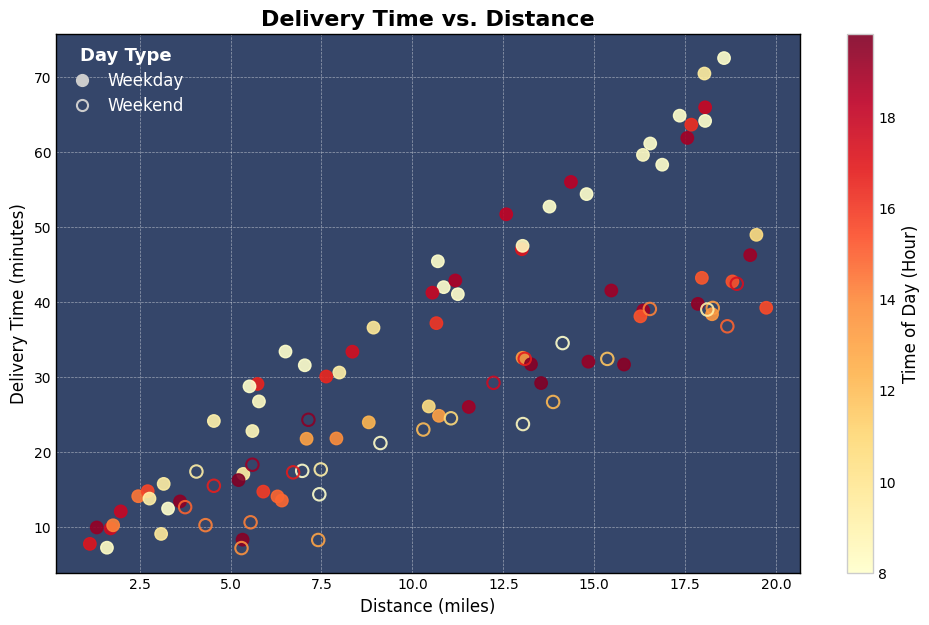

In [6]:
helper_utils.plot_delivery_data(data_df)

<a name='1-2'></a>
### 1.2 - Ingeniería de Características: Añadiendo la Hora Punta (Feature Engineering: Adding Rush Hour)

La visualización anterior revela un patrón interesante: algunas entregas tardan más incluso para la misma distancia, probablemente debido al tráfico máximo durante las **horas punta (rush hours)**.

En lugar de esperar que el modelo aprenda este patrón complejo por sí solo, puedes utilizar la **ingeniería de características (feature engineering)**. Este es un paso creativo donde aplicas conocimiento del dominio para hacer que estos patrones sean explícitos. Crearás una nueva característica que le indique directamente al modelo cuándo una entrega cae dentro de una ventana de hora punta.

> Esta nueva característica será `1` si una entrega fue despachada durante la hora punta de la mañana `(8:00 - 10:00 AM)` o la hora punta de la tarde `(4:00 - 7:00 PM / 16:00 - 19:00)` en un día laborable (weekday), y `0` de lo contrario.

Ahora, quizás te preguntes ¿por qué la hora punta solo se considera en días laborables? Esto refleja un patrón común del mundo real. El concepto de "hora punta" está tradicionalmente ligado al tráfico de personas que viajan al trabajo en días laborables, que es el patrón que impacta los tiempos de entrega de manera más predecible a escala de toda la ciudad. Este patrón específico desaparece los fines de semana.
Por lo tanto, es una suposición realista considerar que el principal motor de los retrasos por hora punta es el trayecto al trabajo en días laborables.

Antes de aplicar la lógica a todo el conjunto de datos, es una buena práctica trabajar con una muestra pequeña. Esto te permite construir y probar tu función rápidamente.

* Define las primeras 5 filas de tu `data_df` como un **tensor de PyTorch**.
* Utilizas un tensor para esta muestra porque tu conjunto de datos completo también se cargará como un tensor. Esto asegura que la función que construyas ahora funcionará en el conjunto de datos completo más adelante sin ningún cambio.
* Este tensor inicial contiene todos los datos para cada entrega de la muestra.

In [9]:
# Define the 5 rows of data as a single 2D tensor
sample_tensor = torch.tensor([
    # distance, time_of_day, is_weekend, delivery_time
    [1.60,      8.20,        0,          7.22],   # row 1
    [13.09,     16.80,       1,          32.41],  # row 2       
    [6.97,      8.02,        1,          17.47],  # row 3
    [10.66,     16.07,       0,          37.17],  # row 4
    [18.24,     13.47,       0,          38.36]   # row 5
], dtype=torch.float32)
print("\nSample Tensor:\n", sample_tensor)


Sample Tensor:
 tensor([[ 1.6000,  8.2000,  0.0000,  7.2200],
        [13.0900, 16.8000,  1.0000, 32.4100],
        [ 6.9700,  8.0200,  1.0000, 17.4700],
        [10.6600, 16.0700,  0.0000, 37.1700],
        [18.2400, 13.4700,  0.0000, 38.3600]])


* Para crear la característica de hora punta (rush hour feature), tu cálculo solo depende de la **hora del día** y de si es **día laborable**.
* Usa la operación de segmentación de tensores (tensor slicing) para seleccionar solo estas dos columnas, ignorando los datos innecesarios de distancia y tiempo de entrega para este paso.
    * La columna `time_of_day_hours` está en el índice `1`, e `is_weekend` está en el índice `2`.

Otra forma para obtener la muestra

In [8]:
sample_tensor = data_df.values[:5]
sample_tensor = torch.tensor(sample_tensor, dtype=torch.float32)
print("\nSample Tensor:\n", sample_tensor)


Sample Tensor:
 tensor([[ 1.6000,  8.2000,  0.0000,  7.2200],
        [13.0900, 16.8000,  1.0000, 32.4100],
        [ 6.9700,  8.0200,  1.0000, 17.4700],
        [10.6600, 16.0700,  0.0000, 37.1700],
        [18.2400, 13.4700,  0.0000, 38.3600]])


In [10]:
# Use tensor slicing to separate out each column
# Slicing syntax is [:, column_index]
sample_hours = sample_tensor[:, 1]
sample_weekends = sample_tensor[:, 2]

print("--- Sliced Tensors ---")
print(f"Sample Hours:    {sample_hours}")
print(f"Sample Weekends: {sample_weekends}\n")

--- Sliced Tensors ---
Sample Hours:    tensor([ 8.2000, 16.8000,  8.0200, 16.0700, 13.4700])
Sample Weekends: tensor([0., 1., 1., 0., 0.])



<br>

Ahora que tienes los tensores `sample_hours` y `sample_weekends` preparados, los usarás para construir la función `rush_hour_feature`.

<a name='ex-1'></a>
### Ejercicio 1 - rush_hour_feature

Implementa la función `rush_hour_feature`.

**Tu tarea:**

* **Define las condiciones individuales:**
    * Define `is_morning_rush` como `True` donde el `hours_tensor` sea mayor o igual a `8.0` **Y** menor que `10.0`.
    * Define `is_evening_rush` como `True` donde el `hours_tensor` sea mayor o igual a `16.0` **Y** menor que `19.0`.
    * Define `is_weekday` como `True` donde el `weekends_tensor` sea igual a `0`.
>
* **Combina las condiciones:**
    * Define `is_rush_hour_mask` combinando los tres tensores booleanos. La lógica debe ser `True` solo si es un día laborable (weekday) **Y** es hora punta de la mañana **O** hora punta de la tarde.

**Consejo**: Puedes usar operadores de comparación estándar (`>=`, `<`, `==`) y operadores lógicos como `&` (AND) y `|` (OR) directamente en los tensores de PyTorch.



<details>
  <summary><b><font color="green">Consejos de código adicionales (Haz clic para expandir si estás atascado)</font></b></summary>
  
Si estás atascado, piensa en cómo construir cada máscara booleana paso a paso.

**Para `is_morning_rush`:**
* Esto requiere dos comparaciones en el `hours_tensor` unidas por un **AND** lógico (`&`).
* Por ejemplo, la primera parte de la condición para el inicio de la ventana es `(hours_tensor >= 8.0)`. Deberás crear la segunda condición (`< 10.0`) y combinarlas.

**Para `is_evening_rush`:**
* Aplica la misma lógica que en la hora punta de la mañana, pero para la ventana de tiempo de la tarde.
* Por ejemplo, la segunda parte de la condición para el final de la ventana es `(hours_tensor < 19.0)`. Deberás crear la primera condición (`>= 16.0`) y combinarlas.

**Para `is_weekday`:**
* Esta es una sola comparación. Necesitas verificar qué elementos en `weekends_tensor` son iguales (`==`) a `0`. La lógica es: `(weekends es igual a 0)`.

**Para `is_rush_hour_mask`:**
* Este paso combina las tres variables que acabas de crear.
* La lógica es: `weekday AND (morning rush OR evening rush)`.
* Recuerda usar paréntesis `()` para agrupar las condiciones `is_morning_rush` e `is_evening_rush` con el operador **OR** lógico (`|`).

</details>

In [22]:
# GRADED FUNCTION: rush_hour_feature

def rush_hour_feature(hours_tensor, weekends_tensor):
    """
    Crea una nueva característica binaria que indica si una entrega se realiza en hora punta de un día laborable.

    Args:
        hours_tensor (torch.Tensor): Un tensor con las horas del día de las entregas.
        weekends_tensor (torch.Tensor): Un tensor que indica si una entrega es en fin de semana.

    Returns:
        torch.Tensor: Un tensor de 0s y 1s que indica si es hora punta en día laborable.
    """

    ### START CODE HERE ###
    
    # Define rush hour and weekday conditions
    is_morning_rush = (hours_tensor >= 8) & (hours_tensor < 10)
    is_evening_rush = (hours_tensor >= 16) & (hours_tensor < 19)
    is_weekday = weekends_tensor == 0

    # Combine the conditions to create the final rush hour mask
    is_rush_hour_mask = ((is_morning_rush | is_evening_rush) & is_weekday)

    ### END CODE HERE ###

    # Convert the boolean mask to a float tensor to use as a numerical feature
    return is_rush_hour_mask.float()

In [23]:
rush_hour_for_sample = rush_hour_feature(sample_hours, sample_weekends)

print(f"Sample Hours:     {sample_hours.numpy()}")
print(f"Sample Weekends:  {sample_weekends.numpy()}")
print(f"Is Rush Hour?:    {rush_hour_for_sample.numpy()}")

Sample Hours:     [ 8.2  16.8   8.02 16.07 13.47]
Sample Weekends:  [0. 1. 1. 0. 0.]
Is Rush Hour?:    [1. 0. 0. 1. 0.]


#### Expected Output

```
Sample Hours:     [ 8.2  16.8   8.02 16.07 13.47]
Sample Weekends:  [0. 1. 1. 0. 0.]
Is Rush Hour?:    [1. 0. 0. 1. 0.]
```

In [ ]:
# Test your code!
unittests.exercise_1(rush_hour_feature)

<a name='1-3'></a>
### 1.3 - Construcción del Pipeline de Preparación de Datos (Building the Data Preparation Pipeline)

Ahora que tienes tu función de ingeniería de características, la aplicarás al pipeline de preparación de datos. El objetivo es crear una única función que tome el DataFrame de pandas original como entrada y devuelva los tensores finales de `features` (características) y `targets` (objetivos) que tu modelo usará para el entrenamiento.

Esta función realizará varias transformaciones clave: llamará a tu función `rush_hour_feature()` para añadir la nueva característica diseñada, normalizará las columnas `distance_miles` y `time_of_day_hours` para que estén en una escala comparable, y gestionará todas las operaciones de tensores necesarias para estructurar los datos correctamente.

Este proceso producirá un único tensor de `features` y un único tensor de `targets`, perfectamente formateados para tu red neuronal.



<a name='ex-2'></a>
### Ejercicio 2 - prepare_data

**Tu Tarea**:

Tu tarea es implementar los pasos principales de manipulación de tensores dentro de la función `prepare_data`. El código para la normalización y la combinación de las características finales ya viene incluido.

* **Convertir DataFrame a Tensor**:
    * Convierte `all_values` (que se extraen del DataFrame de pandas) en un único tensor de PyTorch, `full_tensor`.
    * Recuerda establecer el `dtype` como `torch.float32`.
>     
* **Segmentar en Tensores Crudos (Slice)**:
    * Usa la segmentación de tensores para separar `full_tensor` en tensores 1D individuales para cada columna:
        * `raw_distances` (del índice de columna 0)
        * `raw_hours` (del índice de columna 1)
        * `raw_weekends` (del índice de columna 2)
        * `raw_targets` (del índice de columna 3)
>         
* **Crear la Característica Diseñada**:
    * Llama a la función `rush_hour_feature()` que acabas de construir.
    * Pásale tus tensores recién segmentados `raw_hours` y `raw_weekends`.
>     
* **Redimensionar Tensores de Características (Reshape)**:
    * Usa el método `.unsqueeze(1)` en cada uno de tus cuatro tensores de características (`raw_distances`, `raw_hours`, `raw_weekends` e `is_rush_hour_feature`) para añadir una nueva dimensión.

 to a 2D column vector of shape [N, 1]]

<details>
  <summary><b><font color="green">Consejos de código adicionales (Haz clic para expandir si estás atascado)</font></b></summary>
  
Si necesitas un poco de ayuda, aquí tienes una guía más detallada para cada paso dentro de la función.

**Para `full_tensor`:**
* Usarás la función `torch.tensor()`.
* El primer argumento debe ser `all_values`, y también debes establecer el `dtype` en `torch.float32`.

**Para segmentar en tensores `raw_`:**
* Usarás la sintaxis de segmentación `full_tensor[:, index]` para cada variable.
* Por ejemplo, para obtener `raw_distances`, el código sería `raw_distances = full_tensor[:, 0]`. Sigue este patrón para las otras tres variables usando sus respectivos índices de columna.

**Para `is_rush_hour_feature`:**
* Este paso es simplemente una llamada a una función.
* Necesitas llamar a `rush_hour_feature()` y pasarle los dos tensores que requiere: `raw_hours` y `raw_weekends`.

**Para redimensionar tensores de características (ej., `distances_col`):**
* Este es un paso crucial para preparar tus datos para el modelo.
* Para cada uno de los cuatro tensores de características que tienes (`raw_distances`, `raw_hours`, etc.), necesitas llamar al método `.unsqueeze(1)`.
* Por ejemplo, el primero sería `distances_col = raw_distances.unsqueeze(1)`.

</details>

In [36]:
# GRADED FUNCTION: prepare_data

def prepare_data(df):
    """
    Convierte un DataFrame de pandas en tensores de PyTorch preparados para el modelado.

    Args:
        df (pd.DataFrame): Un DataFrame de pandas que contiene los datos crudos de entrega.

    Returns:
        prepared_features (torch.Tensor): El tensor de características 2D final para el modelo.
        prepared_targets (torch.Tensor): El tensor de objetivos 2D final.
        results_dict (dict): Un diccionario de tensores intermedios para fines de prueba.
    """
    # Extract the data from the DataFrame as a NumPy array
    # (There's no direct torch.from_dataframe(), so we use .values to get a NumPy array first)
    all_values = df.values

    ### START CODE HERE ###

    # Convert all the values from the DataFrame into a single PyTorch tensor
    full_tensor = torch.tensor(all_values, dtype=torch.float32)

    # Use tensor slicing to separate out each raw column
    raw_distances = full_tensor[:, 0]
    raw_hours = full_tensor[:, 1]
    raw_weekends = full_tensor[:, 2]
    raw_targets = full_tensor[:, 3]


    # Call your rush_hour_feature() function to engineer the new feature
    is_rush_hour_feature = rush_hour_feature(raw_hours, raw_weekends)

    # Use the .unsqueeze(1) method to reshape the four 1D feature tensors into 2D column vectors
    distances_col = raw_distances.unsqueeze(1)
    hours_col = raw_hours.unsqueeze(1)
    weekends_col = raw_weekends.unsqueeze(1)
    rush_hour_col = is_rush_hour_feature.unsqueeze(1)

    ### END CODE HERE ###

    # Normalize the continuous feature columns (distance and time)
    dist_mean, dist_std = distances_col.mean(), distances_col.std()
    hours_mean, hours_std = hours_col.mean(), hours_col.std()
 
    distances_norm = (distances_col - dist_mean) / dist_std
    hours_norm = (hours_col - hours_mean) / hours_std

    # Combine all prepared 2D features into a single tensor
    prepared_features = torch.cat([
        distances_norm,
        hours_norm,
        weekends_col,
        rush_hour_col
    ], dim=1) # dim=1 concatenates them column-wise, stacking features side by side

    # Prepare targets by ensuring they are the correct shape
    prepared_targets = raw_targets.unsqueeze(1)
    
    # Dictionary for Testing Purposes
    results_dict = {
        'full_tensor': full_tensor,
        'raw_distances': raw_distances,
        'raw_hours': raw_hours,
        'raw_weekends': raw_weekends,
        'raw_targets': raw_targets,
        'distances_col': distances_col,
        'hours_col': hours_col,
        'weekends_col': weekends_col,
        'rush_hour_col': rush_hour_col
    }
    

    return prepared_features, prepared_targets, results_dict

In [37]:
# Create a small test DataFrame with the first 5 entries
test_df = data_df.head(5).copy()

# Print the "Before" state as a raw tensor
raw_test_tensor = torch.tensor(test_df.values, dtype=torch.float32)
print("--- Raw Tensor (Before Preparation) ---\n")
print(f"Shape: {raw_test_tensor.shape}")
print("Values:\n", raw_test_tensor)
print("\n" + "="*50 + "\n")

# Run the function to get the prepared "after" tensors
test_features, test_targets, _ = prepare_data(test_df)

# Print the "After" state
print("--- Prepared Tensors (After Preparation) ---")
print("\n--- Prepared Features ---\n")
print(f"Shape: {test_features.shape}")
print("Values:\n", test_features)

print("\n--- Prepared Targets ---")
print(f"Shape: {test_targets.shape}")
print("Values:\n", test_targets)

--- Raw Tensor (Before Preparation) ---

Shape: torch.Size([5, 4])
Values:
 tensor([[ 1.6000,  8.2000,  0.0000,  7.2200],
        [13.0900, 16.8000,  1.0000, 32.4100],
        [ 6.9700,  8.0200,  1.0000, 17.4700],
        [10.6600, 16.0700,  0.0000, 37.1700],
        [18.2400, 13.4700,  0.0000, 38.3600]])


--- Prepared Tensors (After Preparation) ---

--- Prepared Features ---

Shape: torch.Size([5, 4])
Values:
 tensor([[-1.3562, -1.0254,  0.0000,  1.0000],
        [ 0.4745,  1.0197,  1.0000,  0.0000],
        [-0.5006, -1.0682,  1.0000,  0.0000],
        [ 0.0873,  0.8461,  0.0000,  1.0000],
        [ 1.2951,  0.2278,  0.0000,  0.0000]])

--- Prepared Targets ---
Shape: torch.Size([5, 1])
Values:
 tensor([[ 7.2200],
        [32.4100],
        [17.4700],
        [37.1700],
        [38.3600]])


#### Expected Output

```
--- Prepared Tensors (After Preparation) ---

--- Prepared Features ---

Shape: torch.Size([5, 4])
Values:
 tensor([[-1.3562, -1.0254,  0.0000,  1.0000],
        [ 0.4745,  1.0197,  1.0000,  0.0000],
        [-0.5006, -1.0682,  1.0000,  0.0000],
        [ 0.0873,  0.8461,  0.0000,  1.0000],
        [ 1.2951,  0.2278,  0.0000,  0.0000]])

--- Prepared Targets ---
Shape: torch.Size([5, 1])
Values:
 tensor([[ 7.2200],
        [32.4100],
        [17.4700],
        [37.1700],
        [38.3600]])
```

In [ ]:
# Test your code!
unittests.exercise_2(prepare_data)

<br>

¡Excelente! Como puedes ver en los resultados de la muestra anterior, tu función `prepare_data` transformó con éxito los datos crudos en los dos tensores distintos que tu modelo necesita para el entrenamiento.

Comenzaste con un archivo `.csv` que contenía todos los datos de cada entrega. Tu función procesó esto y produjo:

* **Un tensor de "features" (características)**: Contiene las cuatro columnas de datos de entrada (distancia, hora del día, indicador de fin de semana, indicador de hora punta) de las cuales el modelo aprenderá. Observa cómo las dos primeras columnas han sido normalizadas y la cuarta columna es tu característica recién creada `is_rush_hour`.

* **Un tensor de "targets" (objetivos)**: Contiene únicamente el `delivery_time_minutes` final, separado de las características de entrada. Este es el valor que tu modelo aprenderá a predecir.


Ahora que has verificado que tu pipeline de preparación de datos funciona correctamente en una muestra pequeña, es hora de ejecutarlo sobre el conjunto de datos completo para preparar los 100 registros de entrega para el entrenamiento.

In [38]:
# Process the entire DataFrame to get the final feature and target tensors.
features, targets, _ = prepare_data(data_df)

<a name='1-4'></a>
### 1.4 - Visualización de los Datos Preparados (Visualizing the Prepared Data)

Ahora que tu pipeline de preparación de datos está completo, puedes visualizar los resultados para confirmar que tu ingeniería de características (feature engineering) funcionó como se esperaba.

#### Gráfico de Entregas en Hora Punta (Rush Hour Deliveries Plot)

* Ejecuta la siguiente celda para mostrar un gráfico de dispersión que muestra la relación entre el `Tiempo de entrega` (Delivery Time) y la `Distancia` (Distance).
* Los puntos estarán coloreados según tu nueva característica, lo que facilita distinguir entre las entregas de "Hora punta" (Rush Hour) y las de "No hora punta" (Not Rush Hour).

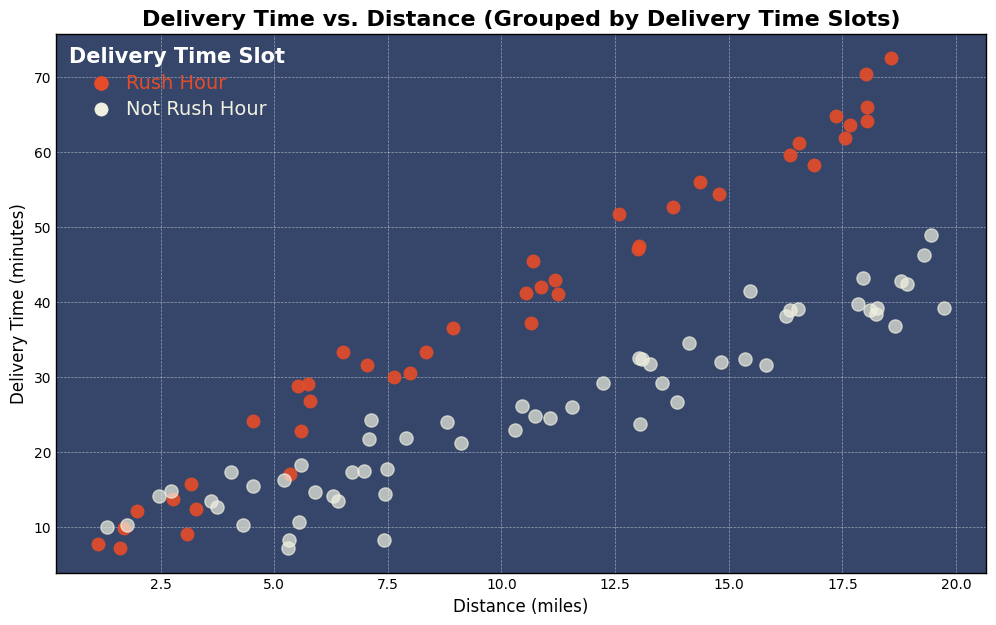

In [39]:
helper_utils.plot_rush_hour(data_df, features)

#### Gráfico Final de los Datos Preparados (Final Prepared Data Plot)

* Ejecuta la celda de abajo para mostrar el gráfico de dispersión que visualiza los datos finales que utilizarás para entrenar tu modelo. Mostrará el `Tiempo de Entrega` (Delivery Time) frente a la `Distancia Normalizada` (Normalized Distance).
* Los puntos están estilizados por cuatro categorías, combinando el tipo de día y tu nueva característica de hora punta (rush hour feature).
* Ten en cuenta que "Fin de semana (Hora punta)" (Weekend - Rush Hour) no aparece, ya que tu característica se aplica correctamente solo a los días laborables (como se explicó anteriormente).

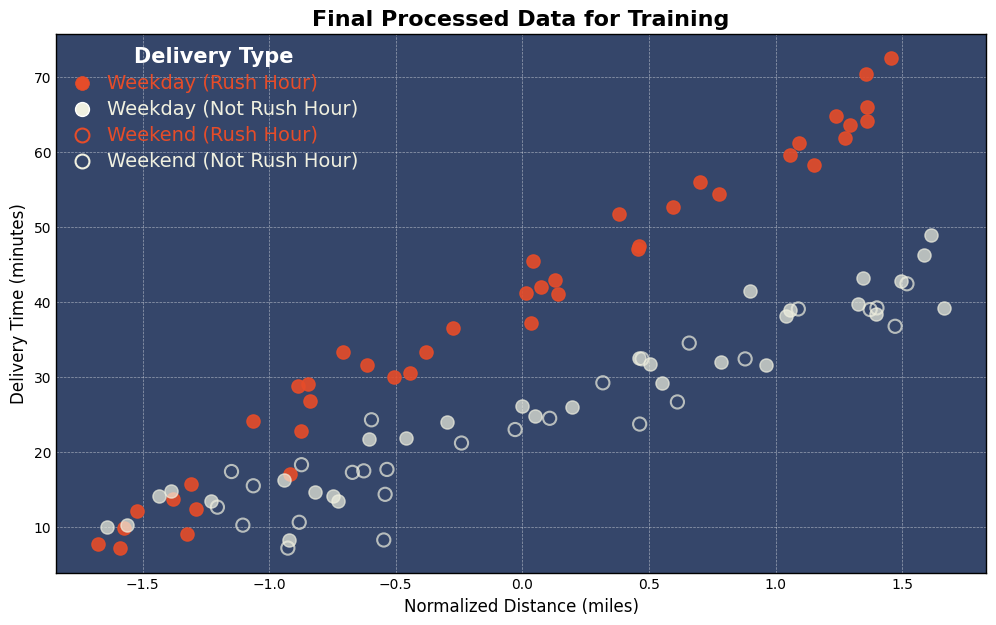

In [40]:
helper_utils.plot_final_data(features, targets)

<a name='2'></a>
## 2 - Construcción de la Red Neuronal (Building the Neural Network)

Con tu pipeline de datos completo, ya estás listo para la siguiente etapa importante: **construir el modelo.**

Dado que tu problema ahora involucra múltiples características, necesitarás una arquitectura más sofisticada que las que habías visto antes. Construirás una red neuronal con dos capas ocultas (hidden layers) para capturar las relaciones complejas entre todas tus características de entrada.



<a name='ex-3'></a>
### Ejercicio 3 - init_model

Implementa la función `init_model` para definir la arquitectura del modelo, el optimizador y la función de pérdida.

**Tu Tarea:**

* **Define la Arquitectura del Modelo**:
    * Define un `model` usando `nn.Sequential`.
    * El modelo **solo debe** tener tres capas `nn.Linear`, cada una seguida por una función de activación `nn.ReLU()`, excepto la última.
        * **Capa de Entrada (Input Layer)**: Una capa `nn.Linear` que acepte **4 características de entrada** y devuelva **64 características**.
        * **Capa Oculta (Hidden Layer)**: Una capa `nn.Linear` que tome las **64 características** de la capa anterior y devuelva **32 características**.
        * **Capa de Salida (Output Layer)**: Una capa `nn.Linear` final que tome las **32 características** de la capa oculta y produzca un **único valor** de salida.
>         
* **Define el Optimizador**:
    * Define el `optimizer` como **Descenso de Gradiente Estocástico (SGD)**. Debes pasarle los parámetros del modelo (`model.parameters()`) y establecer la tasa de aprendizaje (`lr`) en `0.01`.
>
* **Define la Función de Pérdida**:
    * Define la `loss_function` como **Error Cuadrático Medio (MSE)**.



<details>
  <summary><b><font color="green">Consejos de código adicionales (Haz clic para expandir si estás atascado)</font></b></summary>
  
**Para el Modelo:**
* Recuerda listar tus capas dentro del constructor `nn.Sequential()`, separadas por comas.
* La capa `nn.Linear()` toma dos argumentos principales: `in_features` y `out_features`. Asegúrate de que el `in_features` de una capa coincida con el `out_features` de la capa anterior.
* El orden correcto de las capas es: **Capa de Entrada -> ReLU -> Capa Oculta -> ReLU -> Capa de Salida.**

**Para el Optimizador:**
* Usarás `optim.SGD`. Su primer argumento son los parámetros del modelo, que puedes obtener con `model.parameters()`.
* El segundo argumento que debes proporcionar es la tasa de aprendizaje, `lr=0.01`.

**Para la Función de Pérdida:**
* Usarás `nn.MSELoss`. Como es una clase, necesitas crear una instancia de ella llamándola con paréntesis: `nn.MSELoss()`.

</details>

In [41]:
# GRADED FUNCTION: init_model

def init_model():
    """
    Inicializa el modelo de red neuronal, el optimizador y la función de pérdida.

    Returns:
        model (nn.Sequential): El modelo secuencial de PyTorch inicializado.
        optimizer (torch.optim.Optimizer): El optimizador inicializado para el entrenamiento.
        loss_function: La función de pérdida inicializada.
    """

    # Set the random seed for reproducibility of results (DON'T MANIPULATE IT)
    torch.manual_seed(41)

    ### START CODE HERE ###

    # Define the model architecture using nn.Sequential
    model = nn.Sequential(
        # Input layer (Linear): 4 input features, 64 output features
        nn.Linear(4, 64),
        # First ReLU activation function
        nn.ReLU(),
        # Hidden layer (Linear): 64 inputs, 32 outputs
        nn.Linear(64, 32),
        # Second ReLU activation function
        nn.ReLU(),
        # Output layer (Linear): 32 inputs, 1 output (the prediction)
        nn.Linear(32, 1),
    ) 
    
    # Define the optimizer (Stochastic Gradient Descent)
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Define the loss function (Mean Squared Error for regression)
    loss_function = nn.MSELoss()

    ### END CODE HERE ###

    return model, optimizer, loss_function

In [42]:
model, optimizer, loss_function = init_model()

print(f"{'='*30}\nInitialized Model Architecture\n{'='*30}\n{model}")
print(f"\n{'='*30}\nOptimizer\n{'='*30}\n{optimizer}")
print(f"\n{'='*30}\nLoss Function\n{'='*30}\n{loss_function}")

Initialized Model Architecture
Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

Optimizer
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Loss Function
MSELoss()


#### Expected Output:

```
==============================
Initialized Model Architecture
==============================
Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

==============================
Optimizer
==============================
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

==============================
Loss Function
==============================
MSELoss()
```

In [ ]:
# Test your code!
unittests.exercise_3(init_model)

<a name='3'></a>
## 3 - Entrenamiento del Modelo (Training the Model)

Con tus datos preparados y la arquitectura de tu modelo definida, es hora de la etapa más importante: **el entrenamiento**.

<a name='ex-4'></a>
### Ejercicio 4 - train_model

Implementa el bucle de entrenamiento (training loop) completo dentro de la función `train_model`.

**Tu Tarea:**

* **Inicializa tu modelo y herramientas:**
    * Comienza llamando a la función `init_model()` que construiste anteriormente para obtener tu `model`, `optimizer` y `loss_function`.
>     
* **Bucle a través de las épocas (epochs):**
    * Crea un bucle `for` que itere desde 0 hasta el número de `epochs` proporcionado.
>     
* **Implementa los pasos de entrenamiento dentro del bucle:**
    * Realiza estos cinco pasos **en orden** en cada iteración:
        * **Pasada hacia adelante (Forward Pass)**: Pasa tu tensor de `features` al `model` para obtener sus predicciones.
        * **Calcular la Pérdida (Loss)**: Usa tu `loss_function` para comparar las predicciones del modelo con los objetivos reales (`targets`).
        * **Poner a cero los Gradientes (Zero Gradients)**: Pon a cero los gradientes en el `optimizer` de la iteración anterior.
        * **Pasada hacia atrás (Backward Pass)**: Realiza la pasada hacia atrás en tu `loss` para calcular los nuevos gradientes.
        * **Actualizar Pesos (Update Weights)**: Da un paso con el `optimizer` para actualizar los parámetros del modelo.



<details>
  <summary><b><font color="green">Consejos de código adicionales (Haz clic para expandir si estás atascado)</font></b></summary>
  
**Para la Inicialización:**
* La función `init_model()` devuelve tres valores. Puedes desempaquetarlos directamente en tus tres variables: `model, optimizer, loss_function = init_model()`.

**Para la Pasada hacia adelante (Forward Pass):**
* Para obtener las predicciones, puedes llamar a tu objeto `model` como una "función", pasando las `features` como "argumento", `funcion(argumento)`.

**Para Calcular la Pérdida:**
* La función de pérdida también funciona como una función. Toma dos argumentos: tus "predicciones" y los "objetivos reales".

**Para los pasos de Gradiente:**
* Los tres pasos relacionados con el gradiente (`.zero_grad()`, `.backward()` y `.step()`) son todos métodos que deben llamarse con paréntesis, por ejemplo, `optimizer.zero_grad()`.

</details>

In [43]:
# GRADED FUNCTION: train_model

def train_model(features, targets, epochs, verbose=True):
    """
    Entrena el modelo utilizando los datos proporcionados durante un número de épocas.
    
    Args:
        features (torch.Tensor): Las características de entrada para el entrenamiento.
        targets (torch.Tensor): Los valores objetivo para el entrenamiento.
        epochs (int): El número de épocas de entrenamiento.
        verbose (bool): Si es True, imprime el progreso del entrenamiento. Por defecto es True.
        
    Returns:
        model (nn.Sequential): El modelo entrenado.
        losses (list): Una lista de los valores de pérdida registrados cada 5000 épocas.
    """
    
    # Initialize a list to store the loss
    losses = []
    
    ### START CODE HERE ###
    
    # Initialize the model, optimizer, and loss function using `init_model`
    model, optimizer, loss_function = init_model()

    # Loop through the specified number of epochs
    for epoch in range(epochs):
        
        # Forward pass: Make predictions
        outputs = model(features)

        # Calculate the loss
        loss = loss_function(outputs, targets)

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass: Compute gradients
        loss.backward()

        # Update the model's parameters
        optimizer.step()
    
    ### END CODE HERE ### 

        # Every 5000 epochs, record the loss and print the progress
        if (epoch + 1) % 5000 == 0:
            losses.append(loss.item())
            if verbose:
                print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    return model, losses

In [44]:
test_model, loss = train_model(features, targets, 10000)

Epoch [5000/10000], Loss: 3.1763
Epoch [10000/10000], Loss: 1.7668


#### Expected Output (approximately):

```
Epoch [5000/10000], Loss: 3.0901
Epoch [10000/10000], Loss: 1.6064
```

In [ ]:
# Test your code!
unittests.exercise_4(train_model, features, targets)

---
# Submission Note

¡Felicidades! Has completado el último ejercicio calificado de esta tarea.

Si has pasado con éxito todas las pruebas unitarias anteriores, has cumplido con los requisitos básicos de esta asignación. Siéntete libre de enviar tu trabajo ahora. El proceso de calificación se ejecuta en segundo plano, por lo que no interrumpirá tu progreso y puedes continuar con el resto del material.

**🚨 IMPORTANT NOTE** Si has pasado todas las pruebas dentro del notebook, pero el autocalificador muestra un error del sistema después de enviar tu trabajo:

<div style="background-color: #1C1C1E; border: 1px solid #444444; color: #FFFFFF; padding: 15px; border-radius: 5px;">
    <p><strong>Grader Error: Grader feedback not found</strong></p>
    <p>Autograder failed to produce the feedback...</p>
</div>
<br>

Esto suele ser un fallo temporal del sistema. La solución más común es volver a enviar tu tarea, ya que esto a menudo resuelve el problema. En ocasiones, puede ser necesario reintentar el envío más de una vez.
>
If the error persists, please reach out for support in the [DeepLearning.AI Community Forum](https://community.deeplearning.ai/c/course-q-a/pytorch-for-developers/pytorch-fundamentals/560).

---

<br>

Es hora de poner a trabajar tu función `train_model`. Ejecuta el entrenamiento completo sobre las `features` y los `targets`. Entrenarás el modelo durante 30,000 épocas (más que en la ejecución de prueba para asegurar una convergencia total en el conjunto de datos completo), lo que le dará amplias oportunidades para aprender los patrones en los datos.

In [45]:
# Training loop
model, loss = train_model(features, targets, 30000)

Epoch [5000/30000], Loss: 3.1763
Epoch [10000/30000], Loss: 1.7668
Epoch [15000/30000], Loss: 0.9303
Epoch [20000/30000], Loss: 0.8778
Epoch [25000/30000], Loss: 0.9930
Epoch [30000/30000], Loss: 0.5502


<a name='4'></a>
## 4 - Evaluación del Rendimiento del Modelo (Evaluating Model Performance)

Ahora que tu modelo está entrenado, es hora de evaluar su rendimiento. Una forma sencilla pero potente de hacerlo para una tarea de regresión es graficar las predicciones del modelo frente a los valores objetivo reales.

* Primero, utiliza tu `model` entrenado para obtener las predicciones de todo el conjunto de datos.
* Luego, crea un gráfico de dispersión: **Tiempos de Entrega Reales (eje x) vs. Tiempos de Entrega Predichos (eje y)**.
* Si el modelo es preciso, los puntos en el gráfico deberían formar un grupo compacto a lo largo de una línea diagonal recta.
    * Cuanto más cerca estén los puntos de esta línea, mejores serán las predicciones de tu modelo.

¡Veamos qué tan bien lo hizo tu modelo!

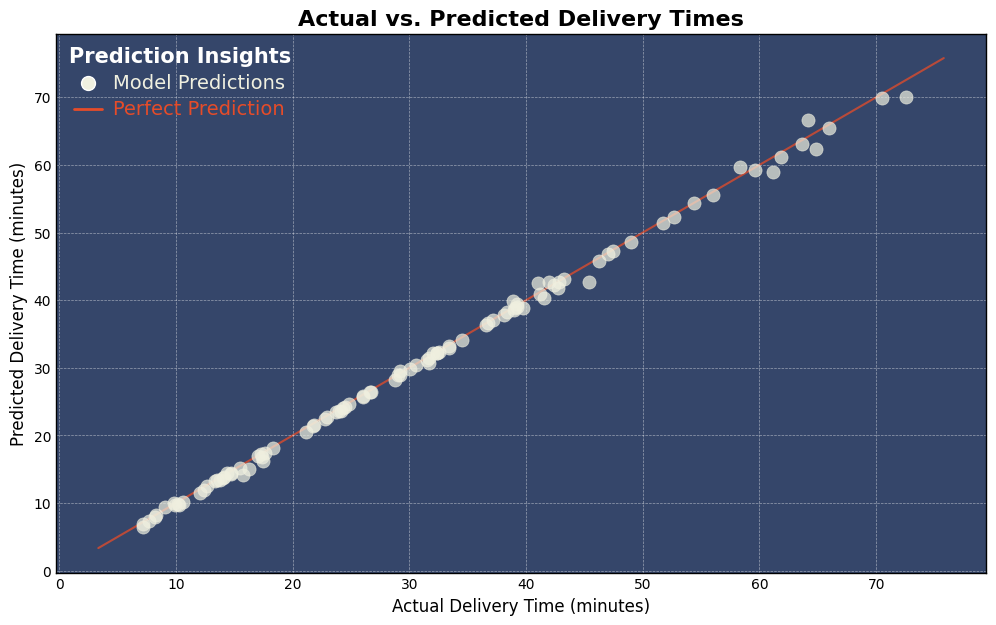

In [46]:
# Disable gradient calculation for efficient predictions
with torch.no_grad():
    # Perform a forward pass to get model predictions
    predicted_outputs = model(features)

# Plot predictions vs. actual targets to evaluate performance
helper_utils.plot_model_predictions(predicted_outputs, targets)

<br>

¡Los resultados se ven fantásticos!

Como puedes ver en el gráfico de "Real vs. Predicho", las predicciones del modelo (los puntos de color gris claro) forman un grupo muy compacto que sigue la línea de "Predicción Perfecta" casi exactamente. Esto indica que tu modelo ha aprendido muy bien los patrones de los datos y está realizando predicciones altamente precisas.

Un resultado como este en un proyecto del mundo real se consideraría un gran éxito. Con el rendimiento de tu modelo evaluado, estás listo para el paso final: usarlo para hacer una predicción sobre datos nuevos y no vistos anteriormente.

<a name='5'></a>
## 5 - Realizar una Nueva Predicción (Making a New Prediction)

Con un modelo bien entrenado y evaluado, has llegado a la etapa final y más práctica: la **predicción**. Es hora de usar tu modelo para realizar una predicción sobre datos nuevos y no vistos.

* Define un nuevo escenario de entrega configurando la distancia, la hora del día y si es fin de semana.

**Nota sobre las Reglas de Negocio:**
Recuerda las restricciones del servicio de entrega al establecer tus valores:
* **Distancia (Distance)**: Debe ser menor o igual a `20` millas.
* **Hora (Time)**: Debe estar entre `8.0` (8:00 AM) y `20.0` (8:00 PM).
* **Fin de semana (Weekend)**: Puede configurarse usando `True`/`False` o `1`/`0`.

In [47]:
# EDITABLE CELL: Set your values below

# Change the values below to get an estimate for a different delivery
# Set distance for the delivery in miles
distance_miles = 5.4
# Set time of day in 24-hour format (e.g., 9.5 for 9:30 AM)
time_of_day_hours = 14.5
# Use True/False or 1/0 to indicate if it's a weekend
is_weekend = 1

# Convert the raw inputs into a 2D tensor for the model
raw_input_tensor = torch.tensor([[distance_miles, time_of_day_hours, is_weekend]], dtype=torch.float32)

Ahora, pasarás tu `model` entrenado, el `data_df` original, tu `raw_input_tensor` y la función `rush_hour_feature` a la función auxiliar. Esta procesará tus nuevas entradas y utilizará el modelo para generar el tiempo de entrega estimado.

In [48]:
helper_utils.prediction(model, data_df, raw_input_tensor, rush_hour_feature)

+------------------------------------------+-----------------------+
|                         Model Prediction                         |
+------------------------------------------+-----------------------+
| Time of the Week                         | Weekend               |
| Distance                                 | 5.4 miles             |
| Time                                     | 14:30                 |
| Is this considered a rush hour period?   | No                    |
+------------------------------------------+-----------------------+
| Estimated Delivery Time                  | 14.01 minutes         |
+------------------------------------------+-----------------------+


## Conclusión 

¡Felicidades por completar tu primera tarea!

Has navegado con éxito por cada etapa clave del pipeline. Comenzaste con datos crudos de un archivo `.csv`, realizaste **ingeniería de características** para añadir lógica de negocio a tu conjunto de datos y construiste un **pipeline de preparación de datos** completo para automatizar el proceso.



A partir de ahí, diseñaste y **entrenaste** una red neuronal multicapa, yendo más allá de los modelos simples de los laboratorios no calificados. Luego, **evaluaste** su rendimiento visualizando sus predicciones y, finalmente, utilizaste tu modelo entrenado para realizar una **predicción** sobre datos nuevos y no vistos.

Las habilidades que has practicado aquí sobre la manipulación de tensores, el diseño de características y la construcción de pipelines de entrenamiento de extremo a extremo son los pilares fundamentales para abordar desafíos aún más complejos en el aprendizaje profundo (deep learning). Ahora tienes una base sólida sobre la cual seguir construyendo a medida que avanzas. ¡Bien hecho!